In [1]:
!pip install Pillow pandas matplotlib


In [15]:
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import json
import os


In [22]:
IMAGE_DIR = "/content/drive/MyDrive/datasets/Images"
CSV_PATH = "/content/drive/MyDrive/datasets/annotations.csv"
OUTPUT_DIR = "/content/drive/MyDrive/datasets/output"

os.makedirs(OUTPUT_DIR, exist_ok=True)


In [19]:
df = pd.read_csv(CSV_PATH)
print("CSV loaded. Number of rows:", len(df))
df.head()

CLASSES = [
    'person','car','chair','bottle','pottedplant','bird','dog','sofa','bicycle','horse',
    'boat','motorbike','cat','tvmonitor','cow','sheep','aeroplane','train','diningtable','bus'
]


CSV loaded. Number of rows: 101


In [20]:
def show_image_with_boxes(image_name):
    img_path = os.path.join(IMAGE_DIR, image_name)
    image = Image.open(img_path)
    draw = ImageDraw.Draw(image)

    image_annots = df[df['Filename'] == image_name]
    for _, row in image_annots.iterrows():
        bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
        draw.rectangle(bbox, outline="red", width=2)
        draw.text((row['xmin'], row['ymin']-10), row['Name'], fill="red")

    plt.figure(figsize=(10,8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image


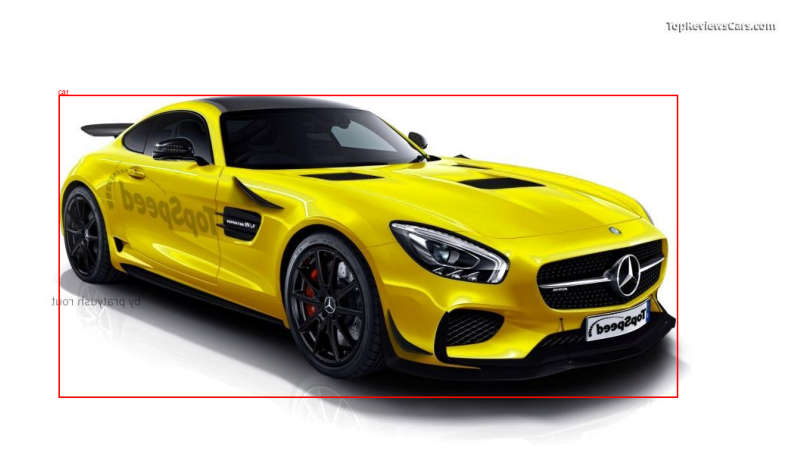

In [29]:
image_name = df['Filename'].iloc[0]
img = show_image_with_boxes(image_name)


In [30]:

json_path = os.path.join(OUTPUT_DIR, image_name.replace('.jpg','.json'))

if os.path.exists(json_path):
    with open(json_path, "r") as f:
        data = json.load(f)
else:
    data = []

data.append(new_bbox)

with open(json_path, "w") as f:
    json.dump(data, f, indent=4)

print(f"Annotation saved to {json_path}\n")

print("Current annotations for this image:")
with open(json_path, "r") as f:
    saved_data = json.load(f)
    for i, ann in enumerate(saved_data, 1):
        print(f"{i}. {ann}")


Annotation saved to /content/drive/MyDrive/datasets/output/Image_1.json

Current annotations for this image:
1. {'Filename': 'Image_1.jpg', 'Name': 'car', 'xmin': 50, 'ymin': 60, 'xmax': 200, 'ymax': 150}
2. {'Filename': 'Image_1.jpg', 'Name': 'car', 'xmin': 50, 'ymin': 60, 'xmax': 200, 'ymax': 150}
